In [21]:
import numpy as np
import pandas as pd

from analaiser import SymbolAnalyzer

# Load data

In [22]:
# %run get_data.ipynb

In [23]:
tickers = pd.read_csv('data/data.csv')
capital = pd.read_csv('data/top_cap.csv')

In [24]:
tickers = tickers.dropna()
tickers

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,symbol
0,2024-09-05,57970.900,58327.070,55643.650,56180.000,2.780691e+04,1725580799999,1.577771e+09,3368058,1.295589e+04,7.349969e+08,0,BTCUSDT
1,2024-09-06,56180.000,57008.000,52550.000,53962.970,5.444777e+04,1725667199999,2.988915e+09,5287281,2.532519e+04,1.390546e+09,0,BTCUSDT
2,2024-09-07,53962.970,54850.000,53745.540,54160.860,1.669405e+04,1725753599999,9.056933e+08,1920923,8.023907e+03,4.353814e+08,0,BTCUSDT
3,2024-09-08,54160.860,55318.000,53629.010,54869.950,1.627415e+04,1725839999999,8.857432e+08,1796092,8.031761e+03,4.372219e+08,0,BTCUSDT
4,2024-09-09,54869.950,58088.000,54591.960,57042.000,3.238452e+04,1725926399999,1.809715e+09,3355912,1.641283e+04,9.176695e+08,0,BTCUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950,2025-12-10,0.964,0.986,0.944,0.951,7.155704e+07,1765411199999,6.882660e+07,158772,3.690079e+07,3.550013e+07,0,ASTERUSDT
19951,2025-12-11,0.952,0.955,0.914,0.939,4.780367e+07,1765497599999,4.450470e+07,99511,2.364019e+07,2.201985e+07,0,ASTERUSDT
19952,2025-12-12,0.939,0.967,0.925,0.950,4.006273e+07,1765583999999,3.796867e+07,96156,1.961515e+07,1.860140e+07,0,ASTERUSDT
19953,2025-12-13,0.950,0.977,0.943,0.955,2.675862e+07,1765670399999,2.563289e+07,58390,1.355990e+07,1.299639e+07,0,ASTERUSDT


In [25]:
capital

,symbol,name,cap
0,BTCUSDT,Bitcoin,1771860657707
1,ETHUSDT,Ethereum,371992092380
2,USDTUSDT,Tether,186287846849
3,BNBUSDT,BNB,121519190299
4,XRPUSDT,XRP,120045770385
...,...,...,...
95,LSETHUSDT,Liquid Staked ETH,1025724336
96,FBTCUSDT,Function FBTC,1022294658
97,ATOMUSDT,Cosmos Hub,1020046825
98,LBTCUSDT,Lombard Staked BTC,986695433


In [26]:
anal = SymbolAnalyzer(tickers, capital)

In [27]:
df = anal.run(symbol_list=[
    'AVAXUSDT',
    'PAXGUSDT',
    'ATOMUSDT', 
    'RENDERUSDT',
    'VETUSDT', 
    'DOTUSDT', 
    'NEARUSDT', 
    'TONUSDT',
    'NEXOUSDT'
    ], optimisation=False)

# df = anal.run(optimisation=False)

# df = anal.run()

Analyzing: 100%|██████████| 6/6 [00:00<00:00, 57.16it/s]


In [28]:
df

,date,symbol,last_price,direction,signal_text,cap,SL,TP,adx,plus_di,...,max_historical,mean_100,mean_30,votes_up,votes_down,total_votes,patterns,kadane_coef,kadane_start,kadane_end
1,2025-12-14,PAXGUSDT,4321.990,⬆️11 (U:37.0 D:17.3 N:17.8),HOLD,1.473996,4134.887002,5186.3880,25.851487,34.160540,...,4436.750,3998.27960,4170.929667,36.973576,17.310873,11,"{'hammer_up': [('2025-09-09', 3632.55), ('2025...",0.0,2025-09-29,2025-10-26
5,2025-12-14,TONUSDT,1.574,⬆️10 (U:30.6 D:10.0 N:8.8),HOLD,3.857256,1.234997,1.8888,36.424879,12.920268,...,3.564,2.27253,1.630067,30.558636,9.970398,10,"{'hammer_up': [('2025-09-08', 3.077), ('2025-0...",0.0,2025-07-26,2025-08-04
0,2025-12-14,AVAXUSDT,12.940,⬆️9 (U:25.2 D:12.9 N:5.7),HOLD,5.561586,9.396941,15.5280,32.314805,17.395935,...,35.190,21.38580,14.051333,25.205633,12.878851,9,"{'hammer_up': [('2025-09-06', 24.09), ('2025-0...",0.0,2025-07-10,2025-10-09
4,2025-12-14,NEARUSDT,1.592,⬆️1 (U:12.5 D:11.5 N:6.5),HOLD,2.042020,1.048085,1.9104,24.398564,12.296833,...,3.175,2.37528,1.907567,12.458696,11.519813,1,"{'hammer_up': [('2025-09-06', 2.374), ('2025-0...",0.0,2025-07-10,2025-07-29
2,2025-12-14,ATOMUSDT,2.107,➡️0 (U:25.2 D:15.4 N:13.4),HOLD,1.020047,1.550684,2.5284,31.731111,14.086357,...,5.186,3.33471,2.448067,25.179063,15.367002,0,"{'hammer_up': [('2025-09-11', 4.587), ('2025-0...",0.0,2025-07-10,2025-07-22
3,2025-12-14,DOTUSDT,1.952,➡️-3 (U:15.8 D:13.2 N:8.4),HOLD,3.219922,1.345341,2.3424,34.147643,14.892713,...,4.549,3.20605,2.335933,15.798291,13.243442,-3,"{'hammer_up': [('2025-09-06', 3.782), ('2025-0...",0.0,2025-07-10,2025-07-27


In [29]:
df['signal_text'].value_counts()

signal_text
HOLD    6
Name: count, dtype: int64

# Технічні індикатори

## 1. ATR (Average True Range)
- **Що це:** Показує волатильність інструменту.
- **Для чого:** Використовується для оцінки ризику, постановки стоп-лоссів.
- **Граничні значення:** не має стандартних "overbought/oversold", високі значення → висока волатильність, низькі → спокійний ринок.

## 2. RSI (Relative Strength Index)
- **Що це:** Індикатор сили тренду.
- **Для чого:** Визначає перекупленість/перепроданість.
- **Граничні значення:**
  - `>70` → перекупленість
  - `<30` → перепроданість
  - `50` → нейтральна зона

## 3. ADX (Average Directional Index)
- **Що це:** Сила тренду без напрямку.
- **Для чого:** Визначає силу тренду, допомагає вирішити, чи торгувати трендово чи боком.
- **Граничні значення:**
  - `>25` → сильний тренд
  - `<20` → слабкий або боковий ринок

## 4. TAIL α (Tail Risk / Steepness α)
- **Що це:** Показник «степеневого хвоста» для негативних доходностей ринку. Відображає, наскільки ринок ще здатний до сильних падінь — фактично оцінює «залишкову енергію хвоста».
- **Для чого:** Використовується для оцінки ризику великих обвалів та ліквідованих позицій; допомагає зрозуміти, чи ринок тимчасово спокійний після серії падінь.
- **Граничні значення:**
  - Низьке α (`<2.5`) → важкий хвіст, висока ймовірність великих падінь (ще є багато «слабких» позицій).
  - Середнє α (`2.5–3`) → класичний режим, ринок відносно збалансований.
  - Високе α (`>3`) → легкий хвіст, ринок спокійний, бо серйозні падіння вже відбулися і потенційні ліквідації менші.

20:18:11 - cmdstanpy - INFO - Chain [1] start processing
20:18:11 - cmdstanpy - INFO - Chain [1] done processing
20:18:11 - cmdstanpy - INFO - Chain [1] start processing
20:18:11 - cmdstanpy - INFO - Chain [1] done processing
20:18:11 - cmdstanpy - INFO - Chain [1] start processing
20:18:11 - cmdstanpy - INFO - Chain [1] done processing
20:18:11 - cmdstanpy - INFO - Chain [1] start processing
20:18:11 - cmdstanpy - INFO - Chain [1] done processing
20:18:11 - cmdstanpy - INFO - Chain [1] start processing
20:18:11 - cmdstanpy - INFO - Chain [1] done processing
20:18:11 - cmdstanpy - INFO - Chain [1] start processing
20:18:11 - cmdstanpy - INFO - Chain [1] done processing


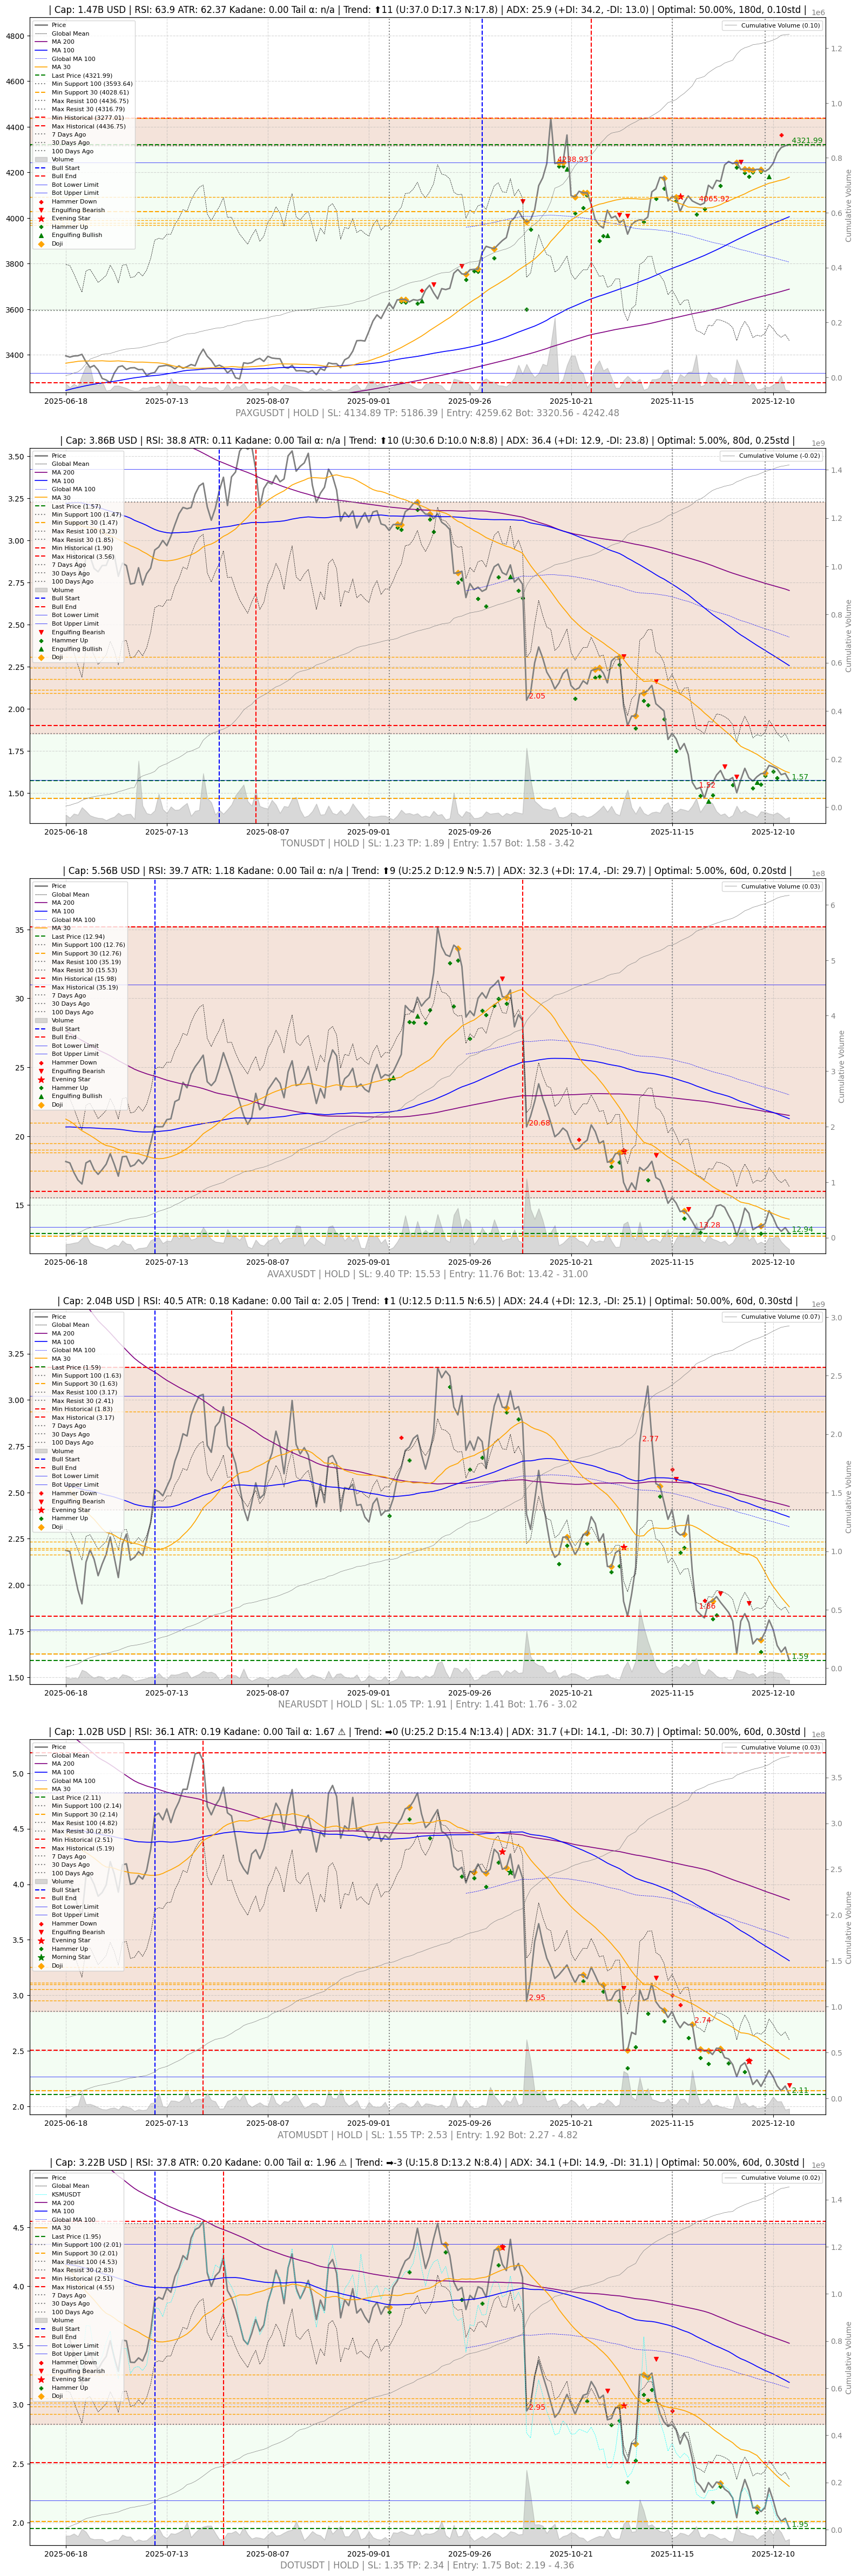

In [30]:
anal.graph()